In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [20]:
data=pd.read_csv('/content/Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [21]:
#@title Performing EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [22]:
#drop the City.Population
data=data.drop(['City.Population'],axis=1)

In [23]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO


In [24]:
#@title according to condition we need to add column is risky or good

In [25]:
y=np.empty(600,dtype=object)
i=0
for value in data['Taxable.Income']:
    if value<=30000:
      y[i]='Risky'
    else:
      y[i]='Good'
    i=i+1

In [26]:
y

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [27]:
df=pd.DataFrame(y,columns=['Class'])
df

,Class
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [28]:
data1=pd.concat([data,df],axis=1)
data1.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Class
0,NO,Single,68833,10,YES,Good
1,YES,Divorced,33700,18,YES,Good
2,NO,Married,36925,30,YES,Good
3,YES,Single,50190,15,YES,Good
4,NO,Married,81002,28,NO,Good


In [29]:
data1.shape

(600, 6)

In [31]:
#categorical col convert into numeric columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1['Undergrad']=le.fit_transform(data1['Undergrad'])
data1['Marital.Status']=le.fit_transform(data1['Marital.Status'])
data1['Urban']=le.fit_transform(data1['Urban'])
data1['Class']=le.fit_transform(data1['Class'])

In [45]:
data1.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Class
0,0,2,68833,10,1,0
1,1,0,33700,18,1,0
2,0,1,36925,30,1,0
3,1,2,50190,15,1,0
4,0,1,81002,28,0,0


In [46]:
data1.Class.value_counts()

0    476
1    124
Name: Class, dtype: int64

In [48]:
colnames=list(data1.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Work.Experience',
 'Urban',
 'Class']

In [33]:
data1.describe()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Class
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,15.558333,0.503333,0.206667
std,0.500017,0.821958,26204.827597,8.842147,0.500406,0.405252
min,0.000000,0.000000,10003.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,8.000000,0.000000,0.000000
50%,1.000000,1.000000,55074.500000,15.000000,1.000000,0.000000
75%,1.000000,2.000000,78611.750000,24.000000,1.000000,0.000000
max,1.000000,2.000000,99619.000000,30.000000,1.000000,1.000000


In [34]:
#check null values
data1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
Work.Experience    0
Urban              0
Class              0
dtype: int64

In [35]:
data1.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
Work.Experience    0
Urban              0
Class              0
dtype: int64

In [37]:
#check duplicate values
data1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [38]:
data1[data1.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Class


<Axes: >

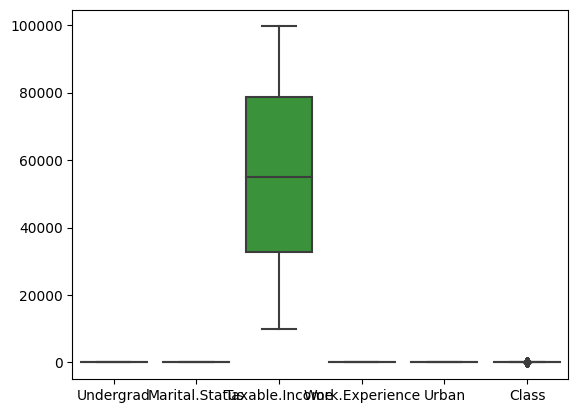

In [39]:
#@title Visualization
import seaborn as sns
sns.boxplot(data1)

array([[<Axes: title={'center': 'Undergrad'}>,
        <Axes: title={'center': 'Marital.Status'}>],
       [<Axes: title={'center': 'Taxable.Income'}>,
        <Axes: title={'center': 'Work.Experience'}>],
       [<Axes: title={'center': 'Urban'}>,
        <Axes: title={'center': 'Class'}>]], dtype=object)

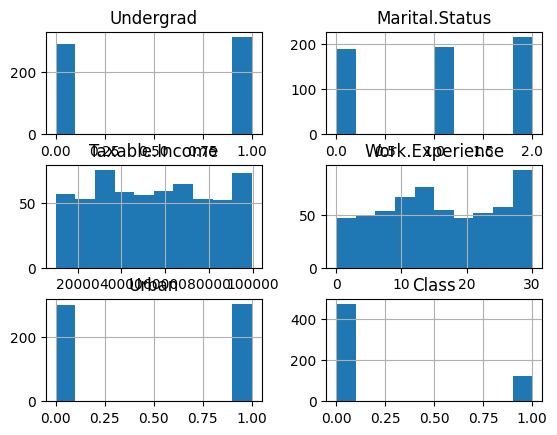

In [43]:
data1.hist()

In [42]:
data1.corr()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Class
Undergrad,1.000000,0.042407,-0.049232,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.012944,-0.002213,0.064562,0.006081
Taxable.Income,-0.049232,-0.012944,1.000000,-0.001818,0.070628,-0.688725
Work.Experience,-0.005362,-0.002213,-0.001818,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,0.070628,-0.094559,1.000000,0.004830
Class,0.012523,0.006081,-0.688725,-0.001972,0.004830,1.000000


<Axes: >

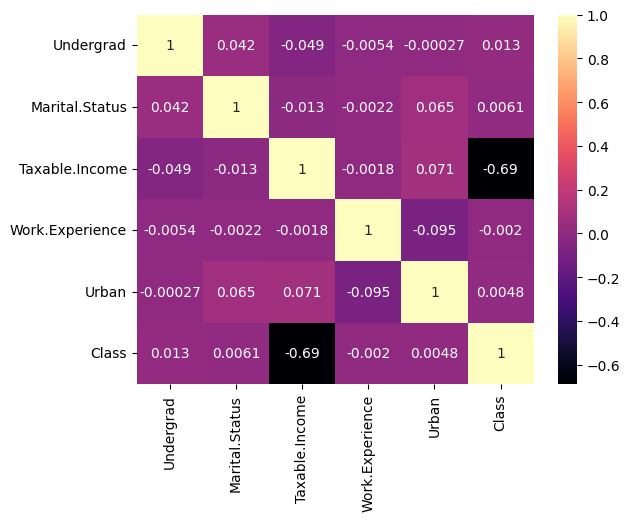

In [52]:
sns.heatmap(data1.corr(),cmap='magma',annot=True)

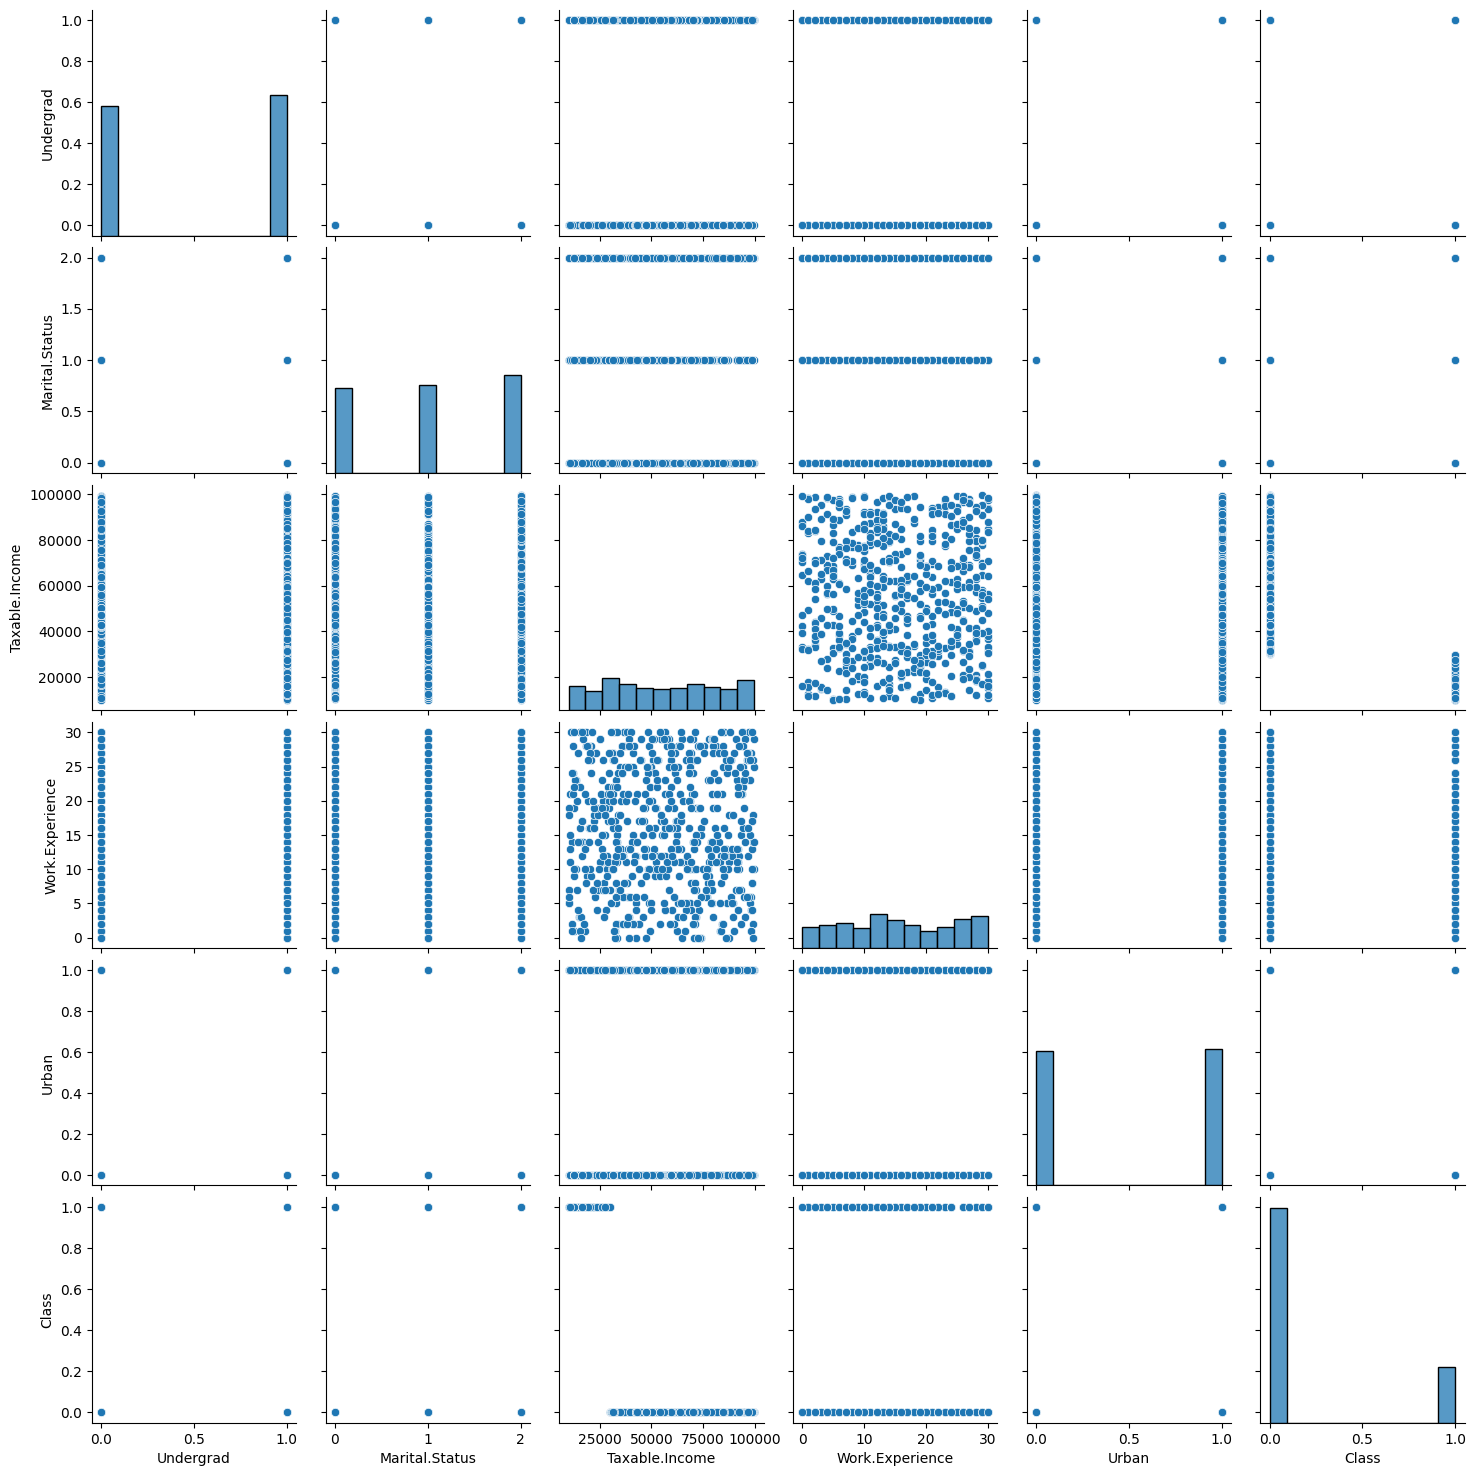

In [49]:
sns.pairplot(data1)

<ipython-input-50-3993f24ddde0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Taxable.Income'])


<Axes: xlabel='Taxable.Income', ylabel='Density'>

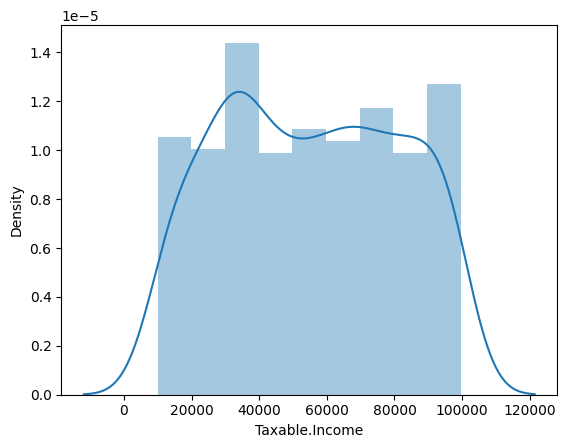

In [50]:
sns.distplot(data1['Taxable.Income'])

<ipython-input-51-1758737c2175>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Work.Experience'])


<Axes: xlabel='Work.Experience', ylabel='Density'>

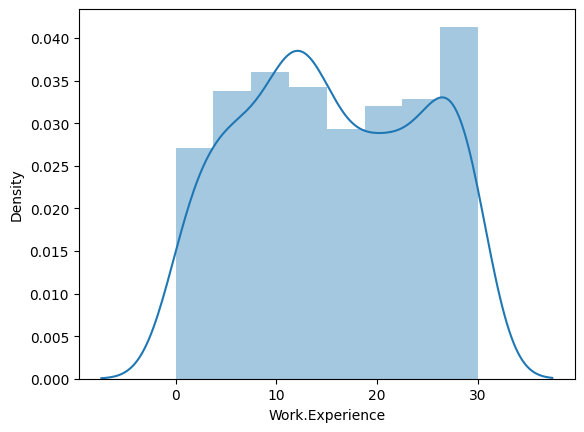

In [51]:
sns.distplot(data1['Work.Experience'])

<Axes: xlabel='Taxable.Income', ylabel='Work.Experience'>

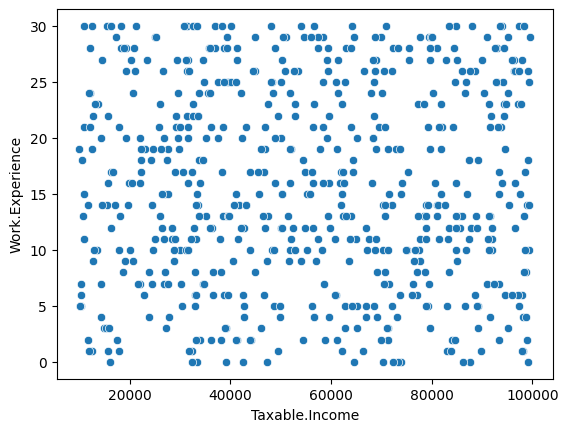

In [53]:
sns.scatterplot(x='Taxable.Income',y='Work.Experience',data=data1)

In [54]:
data1.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Class
0,0,2,68833,10,1,0
1,1,0,33700,18,1,0
2,0,1,36925,30,1,0
3,1,2,50190,15,1,0
4,0,1,81002,28,0,0


In [55]:
#@title Build a Decision tree
x=data1.iloc[:,0:5]
y=data1['Class']

In [56]:
x

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,0,2,68833,10,1
1,1,0,33700,18,1
2,0,1,36925,30,1
3,1,2,50190,15,1
4,0,1,81002,28,0
...,...,...,...,...,...
595,1,0,76340,7,1
596,1,0,69967,2,1
597,0,0,47334,0,1
598,1,1,98592,17,0


In [57]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Class, Length: 600, dtype: int64

In [59]:
colname=list(data1.columns)
colname

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Work.Experience',
 'Urban',
 'Class']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [61]:
x_train

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
378,1,0,36457,6,0
581,1,0,31085,10,1
447,0,1,83061,5,1
252,0,2,72382,28,1
561,0,1,50403,29,1
...,...,...,...,...,...
277,0,0,63710,11,0
9,1,0,98152,4,1
359,1,2,33215,11,0
192,1,1,48313,10,1


In [62]:
y_train

378    0
581    0
447    0
252    0
561    0
      ..
277    0
9      0
359    0
192    0
559    0
Name: Class, Length: 420, dtype: int64

In [63]:
y_test

434    1
122    1
224    0
479    0
205    1
      ..
249    0
357    1
455    0
493    1
134    0
Name: Class, Length: 180, dtype: int64

In [64]:
y_test.shape

(180,)

In [65]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.5, 0.75, 'x[2] <= 30041.5\nentropy = 0.707\nsamples = 420\nvalue = [339, 81]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 81\nvalue = [0, 81]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 339\nvalue = [339, 0]')]

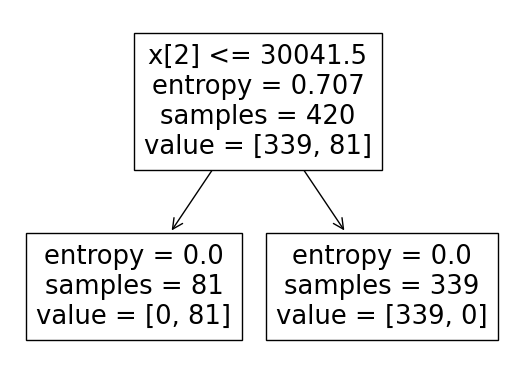

In [66]:
tree.plot_tree(model)

In [67]:
y_train.value_counts()

0    339
1     81
Name: Class, dtype: int64

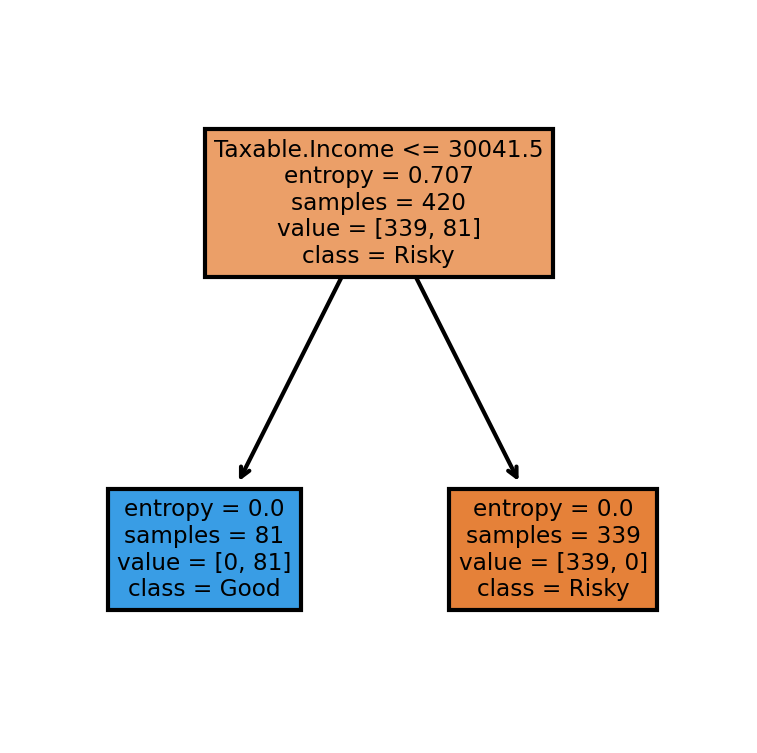

In [71]:
fn=['Undergrad','Marital.Status','Taxable.Income','Work.Experience','Urban']
cn=['Risky','Good']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=300)
tree.plot_tree(model,
               feature_names=fn,
               class_names=cn,
               filled=True);

In [72]:
#prediction
pred=model.predict(x_test)
pd.Series(pred).value_counts()

0    137
1     43
dtype: int64

In [73]:
pred

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0])

In [74]:
pd.crosstab(y_test,pred)

col_0,0,1
Class,,
0,137,0
1,0,43


In [76]:
#Acurracy
np.mean(pred==y_test)

1.0